# Лабораторная работа №1 по ТМО

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [8]:
data = pd.read_csv('airline(csv).csv', sep=",")

In [9]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.00,...,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0,NaN
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.00,...,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0,NaN
2,2019,12,EV,ExpressJet Airlines LLC,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",65.0,13.0,4.52,0.04,...,2.48,0.0,0.0,572.0,233.0,2.0,206.0,0.0,131.0,NaN
3,2019,12,EV,ExpressJet Airlines LLC,BNA,"Nashville, TN: Nashville International",120.0,41.0,11.01,0.74,...,15.25,6.0,0.0,2638.0,670.0,164.0,685.0,0.0,1119.0,NaN
4,2019,12,EV,ExpressJet Airlines LLC,BRO,"Brownsville, TX: Brownsville South Padre Islan...",96.0,17.0,8.01,0.00,...,4.33,1.0,0.0,1037.0,578.0,0.0,139.0,0.0,320.0,NaN


In [10]:
data.shape

(1812, 22)

In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1812


In [12]:
data.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [13]:
data.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [14]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

year - 0
 month - 0
carrier - 0
carrier_name - 0
airport - 0
airport_name - 0
arr_flights - 1
arr_del15 - 1
carrier_ct - 1
 weather_ct - 1
nas_ct - 1
security_ct - 1
late_aircraft_ct - 1
arr_cancelled - 1
arr_diverted - 1
 arr_delay - 1
 carrier_delay - 1
weather_delay - 1
nas_delay - 1
security_delay - 1
late_aircraft_delay - 1
Unnamed: 21 - 1812


In [15]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,1812.0,1812.0,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,0.0
mean,2019.0,12.0,345.534511,70.096632,20.148012,1.745533,21.342811,0.153114,26.707189,3.198785,0.749862,4740.154611,1482.503589,214.988404,1061.373827,6.118719,1975.170072,NaN
std,0.0,0.0,971.562882,181.521516,48.471123,5.213892,67.343888,0.635040,72.174359,11.920279,2.530225,12932.571638,3895.727712,803.965093,4109.275679,28.347074,5446.372151,NaN
min,2019.0,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,12.0,44.000000,7.000000,2.090000,0.000000,1.180000,0.000000,2.025000,0.000000,0.000000,432.000000,115.500000,0.000000,42.000000,0.000000,130.500000,NaN
50%,2019.0,12.0,90.000000,17.000000,6.000000,0.370000,3.960000,0.000000,6.350000,0.000000,0.000000,1161.000000,400.000000,18.000000,148.000000,0.000000,444.000000,NaN
75%,2019.0,12.0,220.000000,49.000000,16.085000,1.550000,11.920000,0.000000,18.200000,2.000000,1.000000,3281.000000,1161.000000,122.000000,491.500000,0.000000,1415.500000,NaN
max,2019.0,12.0,19713.000000,2289.000000,685.740000,89.420000,1039.540000,9.020000,819.660000,224.000000,42.000000,160383.000000,55006.000000,14219.000000,82064.000000,496.000000,75179.000000,NaN


In [16]:
# Определим уникальные значения для целевого признака
data['airport_name'].unique()

array(['Hartford, CT: Bradley International',
       'Bangor, ME: Bangor International',
       'Birmingham, AL: Birmingham-Shuttlesworth International',
       'Nashville, TN: Nashville International',
       'Brownsville, TX: Brownsville South Padre Island International',
       'Baton Rouge, LA: Baton Rouge Metropolitan/Ryan Field',
       'Burlington, VT: Burlington International',
       'Buffalo, NY: Buffalo Niagara International',
       'Akron, OH: Akron-Canton Regional',
       'Charleston, SC: Charleston AFB/International',
       'Cedar Rapids/Iowa City, IA: The Eastern Iowa',
       'Cleveland, OH: Cleveland-Hopkins International',
       'College Station/Bryan, TX: Easterwood Field',
       'Charlotte, NC: Charlotte Douglas International',
       'Columbus, OH: John Glenn Columbus International',
       'Colorado Springs, CO: City of Colorado Springs Municipal',
       'Corpus Christi, TX: Corpus Christi International',
       'Charleston/Dunbar, WV: Yeager',
       'Cinci

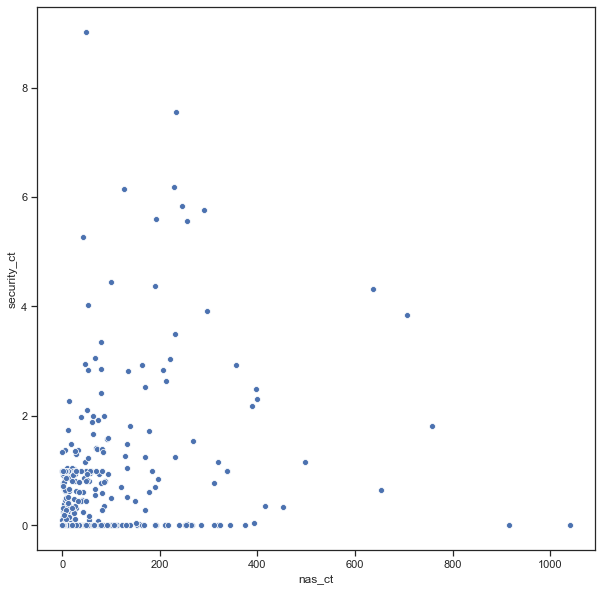

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='nas_ct', y='security_ct', data=data)